In [22]:
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = pd.read_excel('PosNeg.xlsx')

df.columns

Index(['Unnamed: 0', 'Date', 'neg', 'neu', 'pos', 'compound', 'Unnamed: 0.1',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Differ', 'X2',
       'Y2', 'Mid value', 'nextDayMid'],
      dtype='object')

In [24]:
in_seq1 = df['pos'].to_numpy()
in_seq2 = df['neg'].to_numpy()
in_seq3 = df['neu'].to_numpy()
in_seq4 = df['Mid value'].to_numpy()
out_seq = df['Y2'].to_numpy()
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1,in_seq2,in_seq3,in_seq4, out_seq))
print(dataset)

[[4.76065574e-02 6.69508197e-02 8.85475410e-01 1.92312996e+02
  1.91947998e+02]
 [6.68737864e-02 4.91844660e-02 8.83935275e-01 1.94986999e+02
  2.01869995e+02]
 [5.96954315e-02 3.66852792e-02 9.03598985e-01 1.95851997e+02
  2.15962006e+02]
 [7.19757085e-02 3.59838057e-02 8.92048583e-01 2.09141998e+02
  2.23925995e+02]
 [8.77602131e-02 3.04085258e-02 8.81836590e-01 2.21583000e+02
  2.41731995e+02]
 [8.18189252e-02 3.50876168e-02 8.83095794e-01 2.41360001e+02
  2.74316010e+02]
 [6.46712018e-02 4.34943311e-02 8.91845805e-01 2.64383003e+02
  2.77971985e+02]
 [8.71938998e-02 3.46143791e-02 8.78198257e-01 2.76621002e+02
  2.73175995e+02]
 [7.18006135e-02 3.35214724e-02 8.94680982e-01 2.72860001e+02
  2.78855988e+02]
 [5.39979716e-02 2.51419878e-02 9.20858012e-01 2.75984009e+02
  3.08929993e+02]
 [6.28363309e-02 2.13776978e-02 9.15782374e-01 2.92492997e+02
  2.99411987e+02]
 [6.60761317e-02 3.64259259e-02 8.97510288e-01 3.26609985e+02
  3.03359985e+02]
 [6.23456592e-02 3.75530547e-02 9.001125

In [25]:

X = np.array(dataset)
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X[:,:-1], X[:,-1],random_state=1)
print(X_train)
print(y_train)

[[0.48132902 0.20400281 0.54456053 0.45885791]
 [0.50885774 0.3416508  0.39807686 0.86998312]
 [0.43984366 0.29900302 0.51189273 0.41687222]
 [0.35196448 0.3323346  0.58299095 0.48899051]
 [0.34455635 0.2555345  0.65572791 0.41149651]
 [0.64455075 0.32900795 0.25467515 0.41013981]
 [0.54802141 0.29712454 0.39064667 0.61910943]
 [0.52848449 0.20712878 0.48821213 0.50955494]
 [0.21548675 0.1159418  0.91905576 0.9485992 ]
 [0.48659319 0.4799317  0.30698524 0.38244517]
 [0.22300378 0.59978636 0.50487422 0.32029289]
 [0.62717175 0.37783451 0.23348713 0.81275769]
 [0.61876297 0.16647423 0.42026232 0.47919792]
 [0.42909058 0.52702716 0.33271067 0.46821185]
 [0.59987715 0.22542879 0.39236544 0.911622  ]
 [0.57029621 0.50560845 0.19099158 0.81596069]
 [0.47403331 0.30749357 0.46571083 0.90291071]
 [0.55111691 0.33990449 0.35182929 0.47725981]
 [0.40811174 0.01143379 0.78877359 0.20437933]
 [0.58149786 0.20895862 0.42710713 0.26425892]
 [0.35793026 0.42669577 0.49714746 0.17583192]
 [0.93422403 

In [26]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [27]:
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [28]:

# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=2, shuffle=False)

model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
model.fit(X_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
4/4 [==============================] - 5s 9ms/step - loss: 0.2571
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2333
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2261
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2029
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1527
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1113
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0788
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0594
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0558
Epoch 11/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0419
Epoch 12/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0425
Epoch 13/50
4/4 [==============================] - 0s 6ms/step - loss: 0.

In [10]:
from matplotlib import pyplot

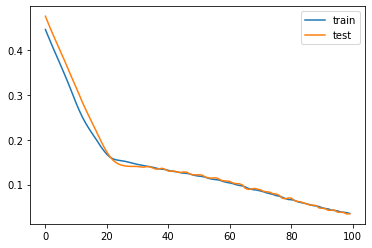

In [11]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
from sklearn.metrics import r2_score
yhat = model.predict(X_test, verbose=0)
accuracy = r2_score(y_test, yhat)
print('Accuracy: %f' % accuracy)

Accuracy: 0.914195


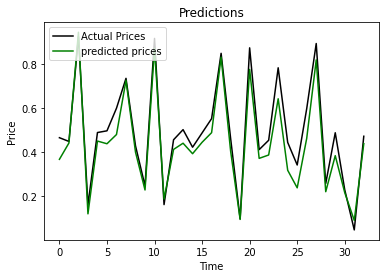

In [32]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='black', label='Actual Prices')
plt.plot(yhat, color='green', label="predicted prices")
plt.title("Predictions")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

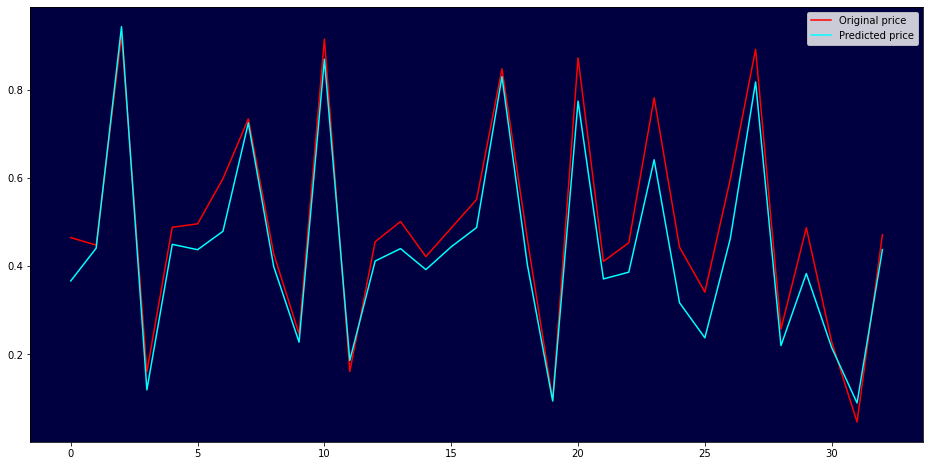

In [43]:
predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions)
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()